# Aufgabe 4
Wandeln Sie den iterativen InsertionSort Algorithmus aus der Vorlesung in einen rekursiven und den rekursiven MergeSort Algorithmus aus der Vorlesung in einen iterativen um.
Analysieren Sie jeweils die Laufzeit Ihrer Algorithmen.

In [1]:
import numba as nb
import numpy as np
import random 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define plt size
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
def new_X():
    """create new random X to be sorted and plot it"""
    global X
    X = np.random.randint(100, size=50)

    sns.barplot(X) 

## 1
### normal insertion sort

<AxesSubplot:>

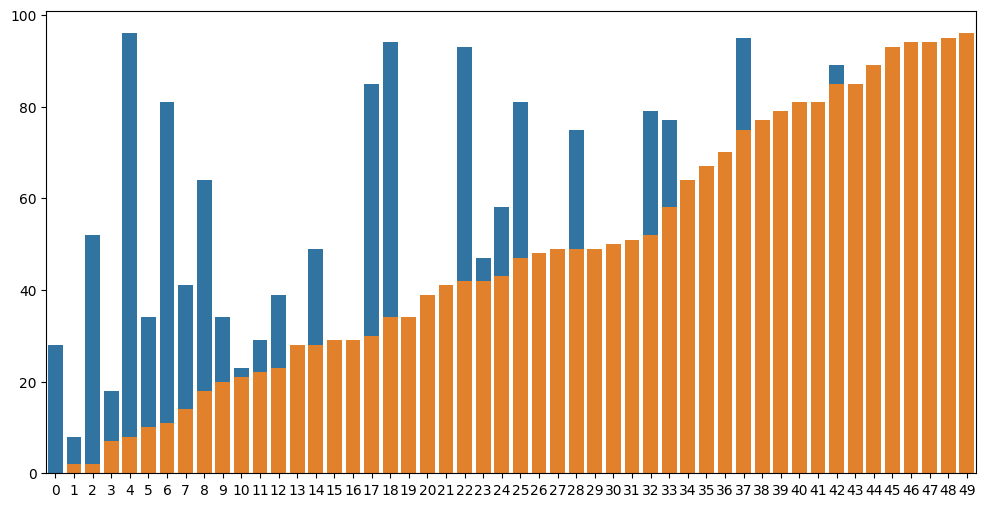

In [4]:
new_X()

def insertion_sort(X):
    n = len(X)
    for j in range(1, n):
        key = X[j]
        i = j - 1
        while i >= 0 and X[i] > key:
            X[i + 1] = X[i]
            i -= 1
        X[i + 1] = key

insertion_sort(X)
sns.barplot(X)

### recursive insertion sort 

<AxesSubplot:>

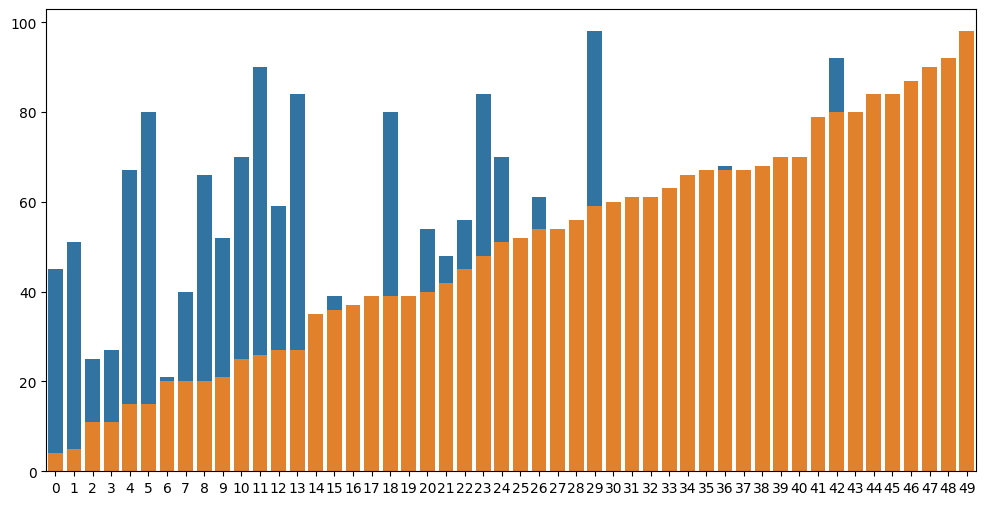

In [9]:
new_X()

def insertion_sort_recursive(X, n=None):
    if n is None:
        n = len(X)

    # Base case: If the array is of size 1 or less, it's already sorted
    if n <= 1:
        return

    # Recursively sort the first n-1 elements
    insertion_sort_recursive(X, n - 1)

    # Insert the last element (X[n-1]) into the sorted part of the array
    key = X[n - 1]
    i = n - 2

    # Move elements of X[0..n-2], that are greater than key, to one position ahead
    while i >= 0 and X[i] > key:
        X[i + 1] = X[i]
        i -= 1

    X[i + 1] = key


insertion_sort_recursive(X)
sns.barplot(X)

### merge sort recursive (standard)

<AxesSubplot:>

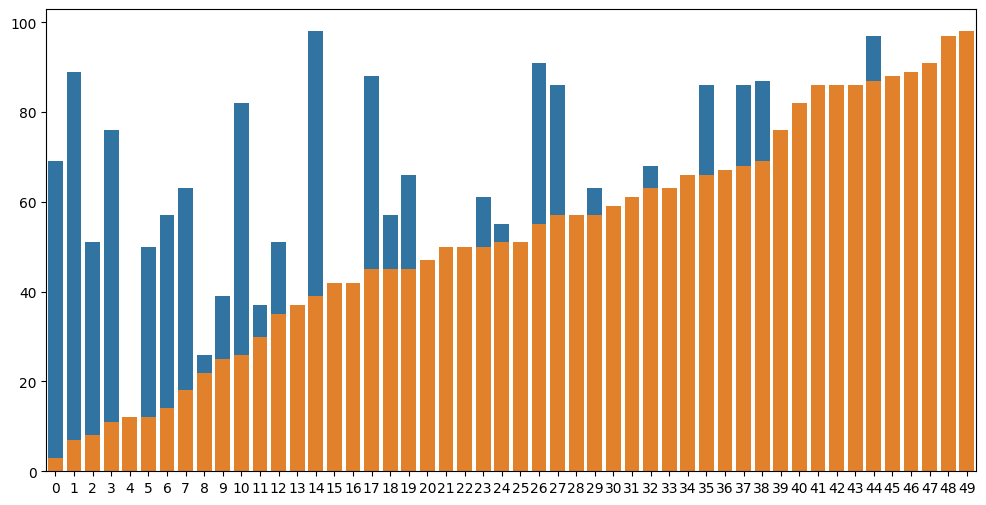

In [12]:
new_X()

def merge(X, f, l, m):
    n = l - f + 1
    a1f = f
    a1l = m - 1
    a2f = m
    a2l = l

    anew = []  # Create a new list to hold merged elements

    # Merge the two halves into anew
    for i in range(n):
        if a1f <= a1l:  # Check if there are elements left in the first half
            if a2f <= a2l:  # Check if there are elements left in the second half
                if X[a1f] <= X[a2f]:
                    anew.append(X[a1f])
                    a1f += 1
                else:
                    anew.append(X[a2f])
                    a2f += 1
            else:
                anew.append(X[a1f])
                a1f += 1
        else:
            anew.append(X[a2f])
            a2f += 1

    # Copy the merged elements back into the original array
    for i in range(n):
        X[f + i] = anew[i]

def merge_sort(X, f, l):
    if f < l:
        m = (f + l + 1) // 2
        merge_sort(X, f, m - 1)
        merge_sort(X, m, l)
        merge(X, f, l, m)


merge_sort(X, 0, len(X) - 1)
sns.barplot(X)

<AxesSubplot:>

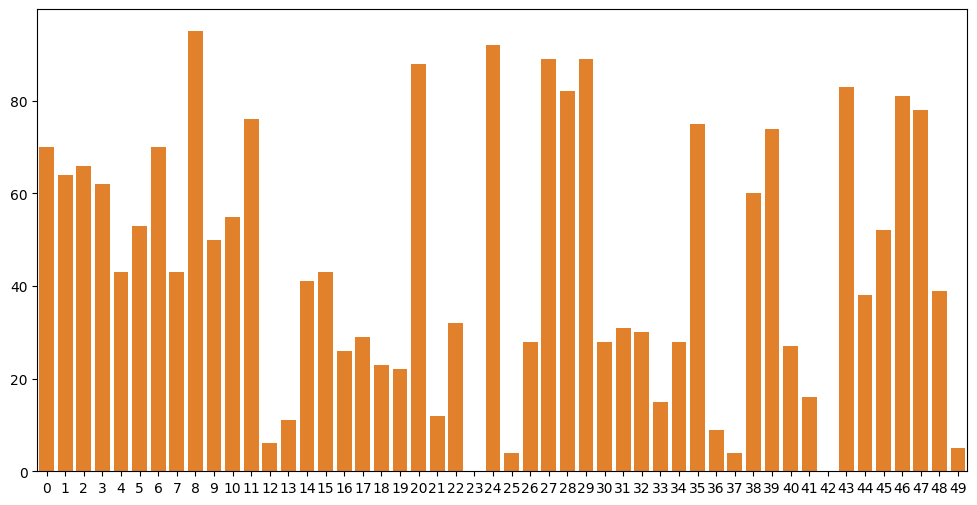

In [25]:
new_X()

def merge_sort_iterative(X):
    n = len(X)
    # Start with subarray size of 1 and double it each time
    current_size = 1

    while current_size < n:
        # Start merging subarrays in pairs
        for left in range(0, n, current_size * 2):
            mid = min(left + current_size - 1, n - 1)
            right = min((left + 2 * current_size - 1), (n - 1))

            if mid < right:  # Only merge if there are elements to merge
                merge(X, left, mid, right)

        current_size *= 2  # Double the subarray size

merge_sort_iterative(X)
sns.barplot(X)